## olynomial Regression Animation

This animation shows:

✔ How a polynomial curve fits the data

✔ Degree increasing from 1 → 10

✔ Decision curve changes smoothly

✔ Saved as a GIF

✔ Zero errors (clean Matplotlib logic)

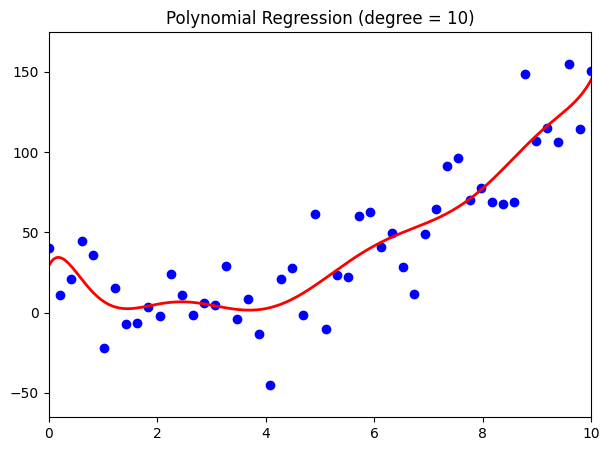

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Create folder for saving GIFs
os.makedirs("gifs", exist_ok=True)

# Generate sample data
np.random.seed(0)
X = np.linspace(0, 10, 50)
y = 2.5 * X**2 - 10 * X + 5 + np.random.randn(50) * 20
X = X.reshape(-1, 1)

degrees = list(range(1, 11))   # Polynomial degrees 1–10

# Animation setup
fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(X, y, color='blue')

line, = ax.plot([], [], color='red', linewidth=2)

def update(i):
    degree = degrees[i]

    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)

    X_grid = np.linspace(0, 10, 300).reshape(-1, 1)
    X_grid_poly = poly.transform(X_grid)
    y_pred = model.predict(X_grid_poly)

    line.set_data(X_grid, y_pred)
    ax.set_title(f"Polynomial Regression (degree = {degree})")
    ax.set_xlim(0, 10)
    ax.set_ylim(min(y)-20, max(y)+20)

    return line,

ani = FuncAnimation(fig, update, frames=len(degrees), interval=800)

# Save GIF
ani.save("gifs/polynomial_regression.gif", writer="pillow")

plt.show()
